In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate

2023-07-12 08:07:24.035972: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-12 08:07:24.231878: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-12 08:07:24.231933: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-12 08:07:25.884414: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# Load the combined CSV and NPZ data
combined_df = pd.read_csv("combined_data.csv")
combined_data = np.load("combined_data.npz")['data']

# Separate the features (input) and labels (output)
features = combined_data[:, 2:] 
labels = combined_df[['HII_EFF_FACTOR', 'ION_Tvir_MIN', 'R_BUBBLE_MAX']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Reshape the input data to match the expected shape for 1D CNN
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [3]:
# Load the saved model
model = keras.models.load_model('./reg_models/CNN_1/CNN_1.h5')

2023-07-12 08:07:31.423952: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-12 08:07:31.424040: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-12 08:07:31.424086: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (iam-ssh1): /proc/driver/nvidia/version does not exist
2023-07-12 08:07:31.424532: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Evaluate the model
y_pred = model.predict(X_test)
loss = model.evaluate(X_test, y_test, verbose=0)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Loss:", loss)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

62/62 [==============================] - 0s 2ms/step
Test Loss: 245.82383728027344
Mean Absolute Error (MAE): 6.864696938825312
R^2 Score: 0.7053104324806306


HII_EFF_FACTOR

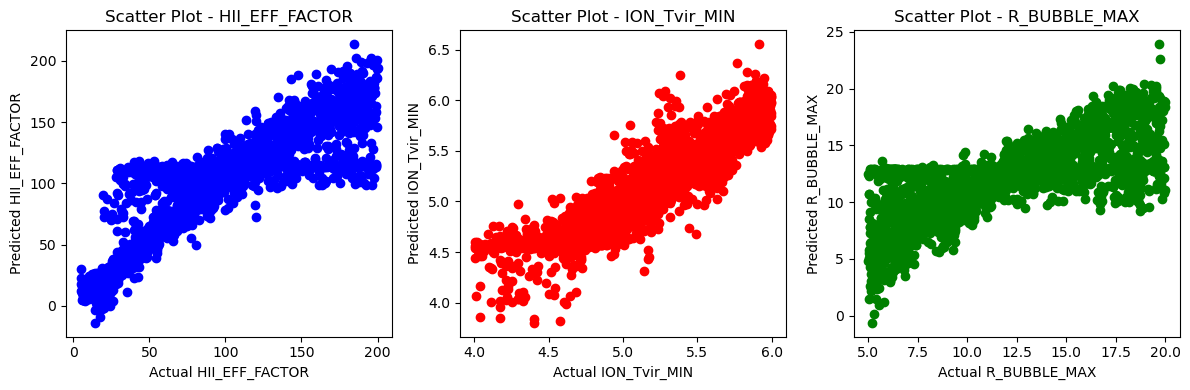

In [5]:
# Creating three separate scatter plots
plt.figure(figsize=(12, 4))

# Scatter plot for HII_EFF_FACTOR
plt.subplot(1, 3, 1)
plt.scatter(y_test.values[:, 0], y_pred[:, 0], c='blue')
plt.xlabel('Actual HII_EFF_FACTOR')
plt.ylabel('Predicted HII_EFF_FACTOR')
plt.title('Scatter Plot - HII_EFF_FACTOR')

# Scatter plot for ION_Tvir_MIN
plt.subplot(1, 3, 2)
plt.scatter(y_test.values[:, 1], y_pred[:, 1], c='red')
plt.xlabel('Actual ION_Tvir_MIN')
plt.ylabel('Predicted ION_Tvir_MIN')
plt.title('Scatter Plot - ION_Tvir_MIN')

# Scatter plot for R_BUBBLE_MAX
plt.subplot(1, 3, 3)
plt.scatter(y_test.values[:, 2], y_pred[:, 2], c='green')
plt.xlabel('Actual R_BUBBLE_MAX')
plt.ylabel('Predicted R_BUBBLE_MAX')
plt.title('Scatter Plot - R_BUBBLE_MAX')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


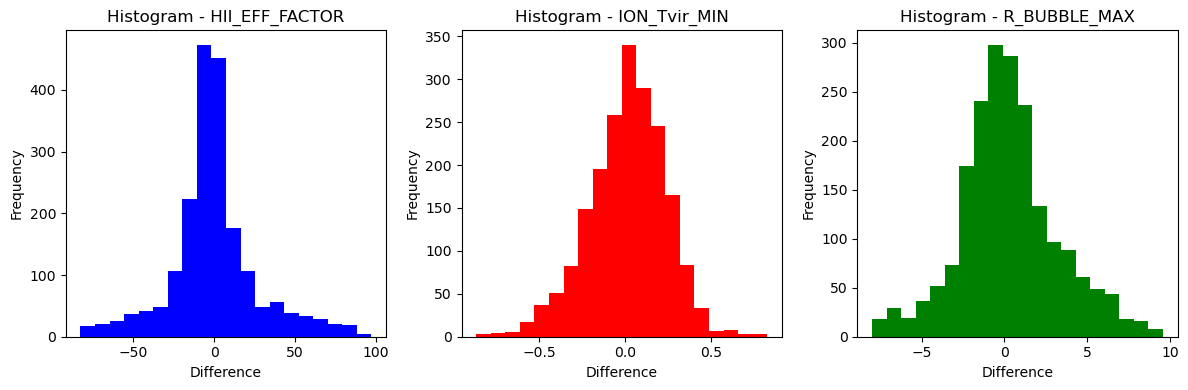

In [6]:
# Calculate the differences between y_test and y_pred for each variable
diff_hii = y_test.values[:, 0] - y_pred[:, 0]
diff_ion = y_test.values[:, 1] - y_pred[:, 1]
diff_rbubble = y_test.values[:, 2] - y_pred[:, 2]

# Creating three separate histograms
plt.figure(figsize=(12, 4))

# Histogram for HII_EFF_FACTOR
plt.subplot(1, 3, 1)
plt.hist(diff_hii, bins=20, color='blue')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Histogram - HII_EFF_FACTOR')

# Histogram for ION_Tvir_MIN
plt.subplot(1, 3, 2)
plt.hist(diff_ion, bins=20, color='red')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Histogram - ION_Tvir_MIN')

# Histogram for R_BUBBLE_MAX
plt.subplot(1, 3, 3)
plt.hist(diff_rbubble, bins=20, color='green')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Histogram - R_BUBBLE_MAX')

# Adjust spacing between subplots
plt.tight_layout()

# Display the histograms
plt.show()

In [7]:
# Calculate RMSE, MAE, MSE, and R2 score for each variable
metrics = []
variables = ['HII_EFF_FACTOR', 'ION_Tvir_MIN', 'R_BUBBLE_MAX']

for i in range(3):
    actual = y_test.values[:, i]
    pred = y_pred[:, i]
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    r2 = r2_score(actual, pred)
    metrics.append([variables[i], rmse, mae, mse, r2])

# Print metrics in a table
headers = ['Variable', 'RMSE', 'MAE', 'MSE', 'R2 Score']
table = tabulate(metrics, headers=headers, floatfmt=".4f", tablefmt="fancy_grid")
print(table)

╒════════════════╤═════════╤═════════╤══════════╤════════════╕
│ Variable       │    RMSE │     MAE │      MSE │   R2 Score │
╞════════════════╪═════════╪═════════╪══════════╪════════════╡
│ HII_EFF_FACTOR │ 26.9926 │ 18.1964 │ 728.5987 │     0.7760 │
├────────────────┼─────────┼─────────┼──────────┼────────────┤
│ ION_Tvir_MIN   │  0.2253 │  0.1768 │   0.0508 │     0.8033 │
├────────────────┼─────────┼─────────┼──────────┼────────────┤
│ R_BUBBLE_MAX   │  2.9702 │  2.2209 │   8.8220 │     0.5367 │
╘════════════════╧═════════╧═════════╧══════════╧════════════╛
